<a href="https://colab.research.google.com/github/chatmethar-comp/CondoRegressionModel/blob/main/linearCondoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression Condominiam**

In [ ]:
import numpy as np
x = np.array([35,47,42,44,45,45,50,42,43,44,40,41,37,39,32,36])
y = np.array([2911,4000,3822,3900,3894,4102,4264,3714,3954,4000,3789,3900,2985,3951,1920,3544])
x = x.reshape(-1,1)

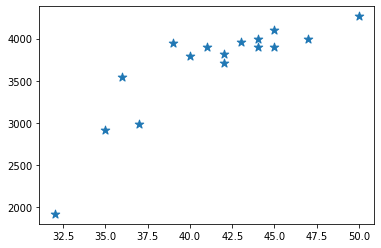

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y, s=80, marker = '*')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression(normalize=True)
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
y_pred = LR.predict(x)
print(y_pred)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,y_pred))
print("rmse root mean sqare error =",rmse)

r2 = r2_score(y,y_pred)
print("R2 = ",r2)

[2989.19213483 4262.47752809 3731.94194757 3944.15617978 4050.26329588
 4050.26329588 4580.7988764  3731.94194757 3838.04906367 3944.15617978
 3519.72771536 3625.83483146 3201.40636704 3413.62059925 2670.87078652
 3095.29925094]
rmse root mean sqare error = 303.9152760843936
R2 =  0.7177248113014503


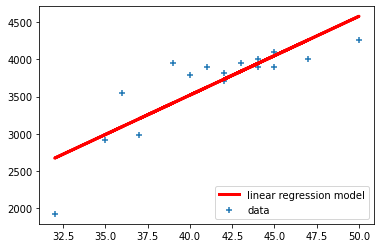

In [ ]:
plt.scatter(x,y,marker= '+',label = 'data')
plt.plot(x,y_pred,linewidth=3,color = 'r',label = 'linear regression model')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
data_predict = [63]
print("63 m2 area cost",LR.predict([data_predict])[0],"thousand bath","\nposibility {:.2f}%".format(r2_score(y,y_pred)*100))

63 m2 area cost 5960.191385767791 thousand bath 
posibility 71.77%


## **Polynomial Regression Condominiam**

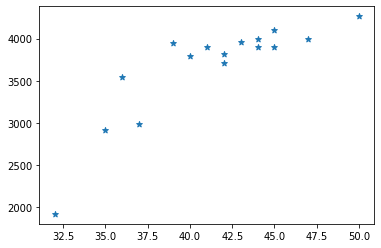

In [ ]:
plt.scatter(x,y,marker='*')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
poly_feature = PolynomialFeatures(degree=2)
x_poly = poly_feature.fit_transform(x)
print(x_poly)

[[1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.700e+01 2.209e+03]
 [1.000e+00 4.200e+01 1.764e+03]
 [1.000e+00 4.400e+01 1.936e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.000e+01 2.500e+03]
 [1.000e+00 4.200e+01 1.764e+03]
 [1.000e+00 4.300e+01 1.849e+03]
 [1.000e+00 4.400e+01 1.936e+03]
 [1.000e+00 4.000e+01 1.600e+03]
 [1.000e+00 4.100e+01 1.681e+03]
 [1.000e+00 3.700e+01 1.369e+03]
 [1.000e+00 3.900e+01 1.521e+03]
 [1.000e+00 3.200e+01 1.024e+03]
 [1.000e+00 3.600e+01 1.296e+03]]


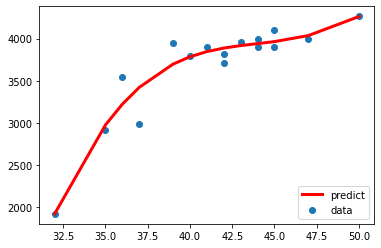

In [ ]:
poly_model = LinearRegression()
poly_model = poly_model.fit(x_poly,y)
plt.scatter(x,y,label='data')

sorted_zip = sorted(zip(x,y_pred_poly))
x_plot, y_plot = zip(*sorted_zip)
plt.plot(x_plot,y_plot,label='predict',linewidth=3,color='r')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
y_pred_poly = poly_model.predict(x_poly)
print("rmse:",np.sqrt(mean_squared_error(y,y_pred_poly)))
print("r2:",r2_score(y,y_pred_poly))

rmse: 164.29630171516922
r2: 0.9175058368195064


## **Boston data**

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()

In [ ]:
x = boston.data
y = boston.target
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [ ]:
LRboston = LinearRegression(normalize=True)

In [ ]:
LRboston.fit(X_train,y_train)
y_predboston = LRboston.predict(X_test)
print(y_predboston)

[23.32174795 18.70247168 21.74195781 24.84155038 28.27021446 35.95490603
 10.25404509 34.80210393 17.3764911  33.94780276 23.03517061 17.01315851
 25.69021998 20.44146726  8.80016007 13.37381025 20.15461226  6.41840692
 27.88164968 17.66148648 18.43558216 14.63893352 22.30648379 13.18919003
 27.4827997  14.87442482 22.5486671  22.85273406 20.91221807 18.40245113
 13.37800575 30.36419767 20.20906961  3.05602515 34.62195559 19.50049809
 28.24934325 14.2887738  14.98902351 40.28861448 19.4540086  26.9373588
 22.12630386 19.12946473  1.23579329 26.9143107  20.76561329 22.40563086
 20.97868298 12.94224898 17.43594577 15.63590682 35.03201961 27.25686981
 12.44443172 15.25001517  9.50628375 38.65949426 19.02885351 32.46531183
 18.82311559 38.19666374 20.3617537  16.84318348  6.73357875 17.35239838
 30.26792932 25.81252468 24.61335903  0.89670479 22.13885437 24.36465943
 19.54235959 20.69504542 30.61623616 30.66346124 14.65337469 15.73032897
 32.86298157 42.4626336  25.75807334 24.56186686 27.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = np.sqrt(mean_squared_error(y_predboston,y_test))
print(rmse )
print(r2_score(y_predboston,y_test))

5.155454904880552
0.6055580484819394
